<a href="https://colab.research.google.com/github/amomoan/python/blob/master/%E3%82%B3%E3%83%AD%E3%83%8A%E6%84%9F%E6%9F%93%E8%80%85%E6%8E%A8%E7%A7%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

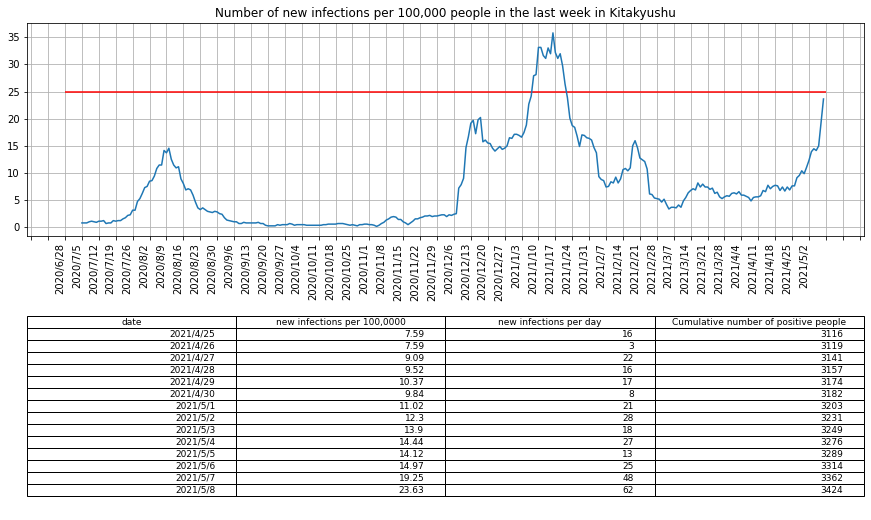

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

url_infections="https://ckan.open-governmentdata.org/dataset/876ed829-9dcd-46a7-98d4-c3722886e945/resource/6e30e40f-c415-4733-be10-c549c66065b9/download/401005_kitakyushu_covid19_patients_symptom.csv"
infections=pd.read_csv(url_infections, encoding="shift-jis")
#北九州市人口
popu = 935084
popu2 = popu/100000

df=infections['陽性者数_累計']

sumdate = df.diff() # 新規感染者
sumdate.name = "新規陽性者数"
sumweek2 = pd.concat([infections, sumdate], axis=1, join='inner')

sumweek = round(sumdate.rolling(7).sum()/popu2,2) # 移動合計
sumweek.name = "直近1週間の10万人あたりの新規感染者数"
sumweek2 = pd.concat([sumweek2, sumweek], axis=1, join='inner')

# グラフ描画1
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3) # グラフ間隔
ax1 = fig.add_subplot(2,1,1)
ax1.plot(sumweek2["状況_年月日"],sumweek2["直近1週間の10万人あたりの新規感染者数"])

ax1.set_title("Number of new infections per 100,000 people in the last week in Kitakyushu")
# ax1.set_xlabel("Date")
# ax1.set_ylabel("Number of people")
# ax1.legend() # 凡例
ax1.xaxis.set_major_locator(plticker.MultipleLocator(7)) 
fig.autofmt_xdate(rotation=90)
plt.grid(True)

# 補助線
xmin, xmax = 0, len(sumweek2)
plt.hlines(25,xmin, xmax, "red", linestyle="solid")

# グラフ描画2
ax2 = fig.add_subplot(2,1,2)
ax2.axis('tight')
ax2.axis('off')
tail_sumweek = sumweek2.loc[:,['状況_年月日','直近1週間の10万人あたりの新規感染者数',"新規陽性者数","陽性者数_累計"]].tail(14)
# 型変換
tail_sumweek['新規陽性者数'] = tail_sumweek['新規陽性者数'].astype(int)

ax2.table(cellText=tail_sumweek.values, colLabels=["date","new infections per 100,0000","new infections per day","Cumulative number of positive people"],loc="center",)
plt.show()

fig.savefig("new infections in kitakyushu.png")